In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Add the dataset to analysis data
#Add list with variables to missing values
#Define data type of the column "VALUE" as fload to avoid future issues
# Read the CSV file into a DataFrame

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
passenger_journeys = pd.read_csv("passenger_journey.csv" , na_values = missing_value_formats,  dtype={'VALUE': float})

In [3]:
#Check the 5 first rows of the dataset
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0


# Exploratory Data Analysis

In [4]:
#Check shape of the data in this case dataset has 1040 rows and 5 columns
passenger_journeys.shape

(1040, 5)

In [5]:
#Check information general of the dataset (data types, range of index, information of the columns and the memory used)
passenger_journeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Statistic Label    1040 non-null   object 
 1   Week               1040 non-null   object 
 2   Mode of Transport  1040 non-null   object 
 3   UNIT               1040 non-null   object 
 4   VALUE              976 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.8+ KB


In [6]:
#Check the measures of central tendency and measures of dispersion 
passenger_journeys.describe()

,VALUE
count,9.760000e+02
mean,1.755135e+06
std,1.435038e+06
min,2.323100e+04
25%,6.167142e+05
50%,9.525170e+05
75%,2.992955e+06
max,5.488658e+06


In [7]:
#Check the unique values of each columns in the dataset.
passenger_journeys.nunique()

Statistic Label        1
Week                 260
Mode of Transport      4
UNIT                   1
VALUE                975
dtype: int64

In [8]:
#Check the data types of the dataset to see how many differents dtypes 
#exist and if is required to transform to a different one for further analysis. 
passenger_journeys.dtypes

Statistic Label       object
Week                  object
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

In [9]:
#Check missing values this fucntion will check all the null values and each column and sum up them. 
#51370 missing values were detected in "VALUE" column

passenger_journeys.isnull().sum()

Statistic Label       0
Week                  0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [10]:
#This function is used to returs the numbers of times that a value appear in a list in the dataset. 
# Counting missing values =16022 in "VALUE" column
passenger_journeys.count() 

Statistic Label      1040
Week                 1040
Mode of Transport    1040
UNIT                 1040
VALUE                 976
dtype: int64

In [11]:
#This function will show if there is any rows or colums that containing duplicate data.
duplicate_rows_df = passenger_journeys[passenger_journeys.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 5)


## Cleaning the data

Text(0.5, 1.0, 'Feature Statistics')

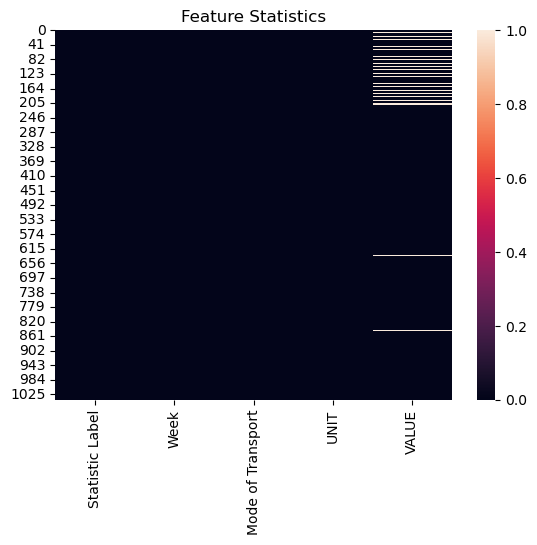

In [12]:
#This heatmap will show a visual representation of the missing value in the dataset
#It is posible to observe there is only one column with missing values = VALUE 
sns.heatmap(passenger_journeys.isnull())
plt.title("Feature Statistics")

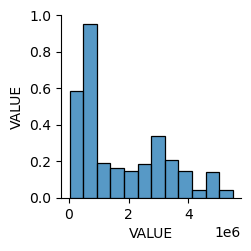

In [13]:
#Using a pairplot to check correlation
#However,there is not a good correlation between numerical variables. 
sns.pairplot(passenger_journeys)

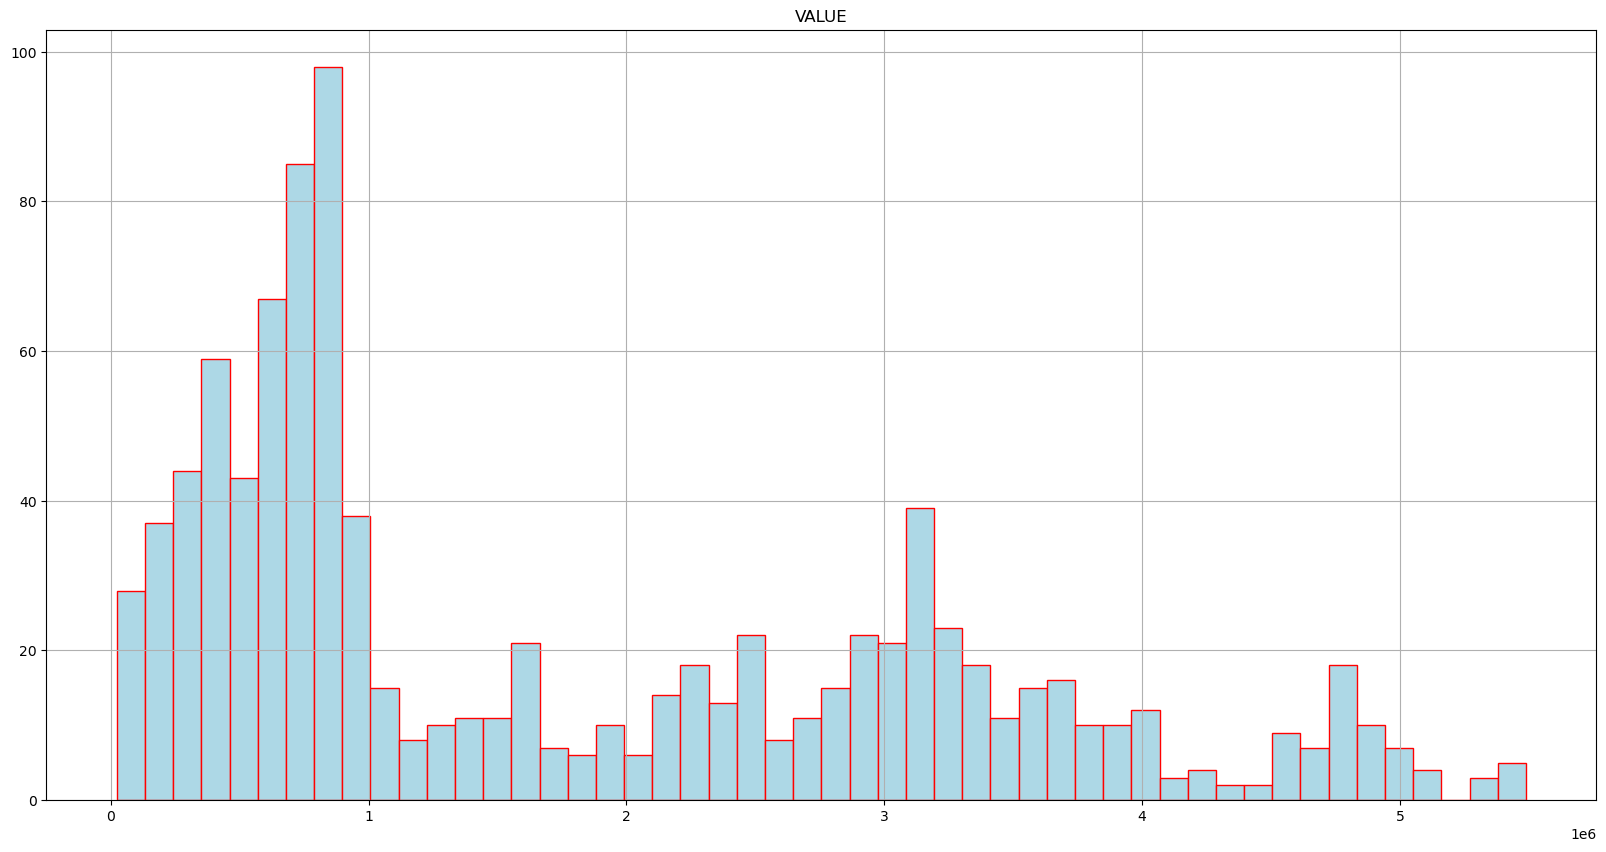

In [14]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Data Preparation

In [15]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'
passenger_journeys['Year'] = passenger_journeys['Week'].str[:4]

# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,2019 Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,2019 Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,2019 Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,2019 Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,2019 Week 02,Dublin Metro Bus,Number,2709579.0,2019


In [16]:
# Extract the first 4 digits from the 'Week' column and create a new column 'Year'

passenger_journeys['Week'] = passenger_journeys['Week'].str[5:]
# Display the modified DataFrame
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,Week 01,Rail,Number,NaN,2019
3,Passenger Journeys,Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019


# Handling Missing values 

In [17]:
passenger_journeys['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(passenger_journeys['VALUE'].head(10)) 

0    1987891.0
1     497598.0
2    1491543.5
3    2485489.0
4    2709579.0
5     633764.0
6    1988553.5
7    3343343.0
8    2784678.0
9     678097.0
Name: VALUE, dtype: float64


In [18]:
#Checking null values
passenger_journeys.isnull().sum()

Statistic Label      0
Week                 0
Mode of Transport    0
UNIT                 0
VALUE                0
Year                 0
dtype: int64

In [19]:
#checking first 5 rows
passenger_journeys.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
1,Passenger Journeys,Week 01,"Bus, excluding Dublin Metro",Number,497598.0,2019
2,Passenger Journeys,Week 01,Rail,Number,1491543.5,2019
3,Passenger Journeys,Week 01,"All public transport, excluding LUAS",Number,2485489.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019


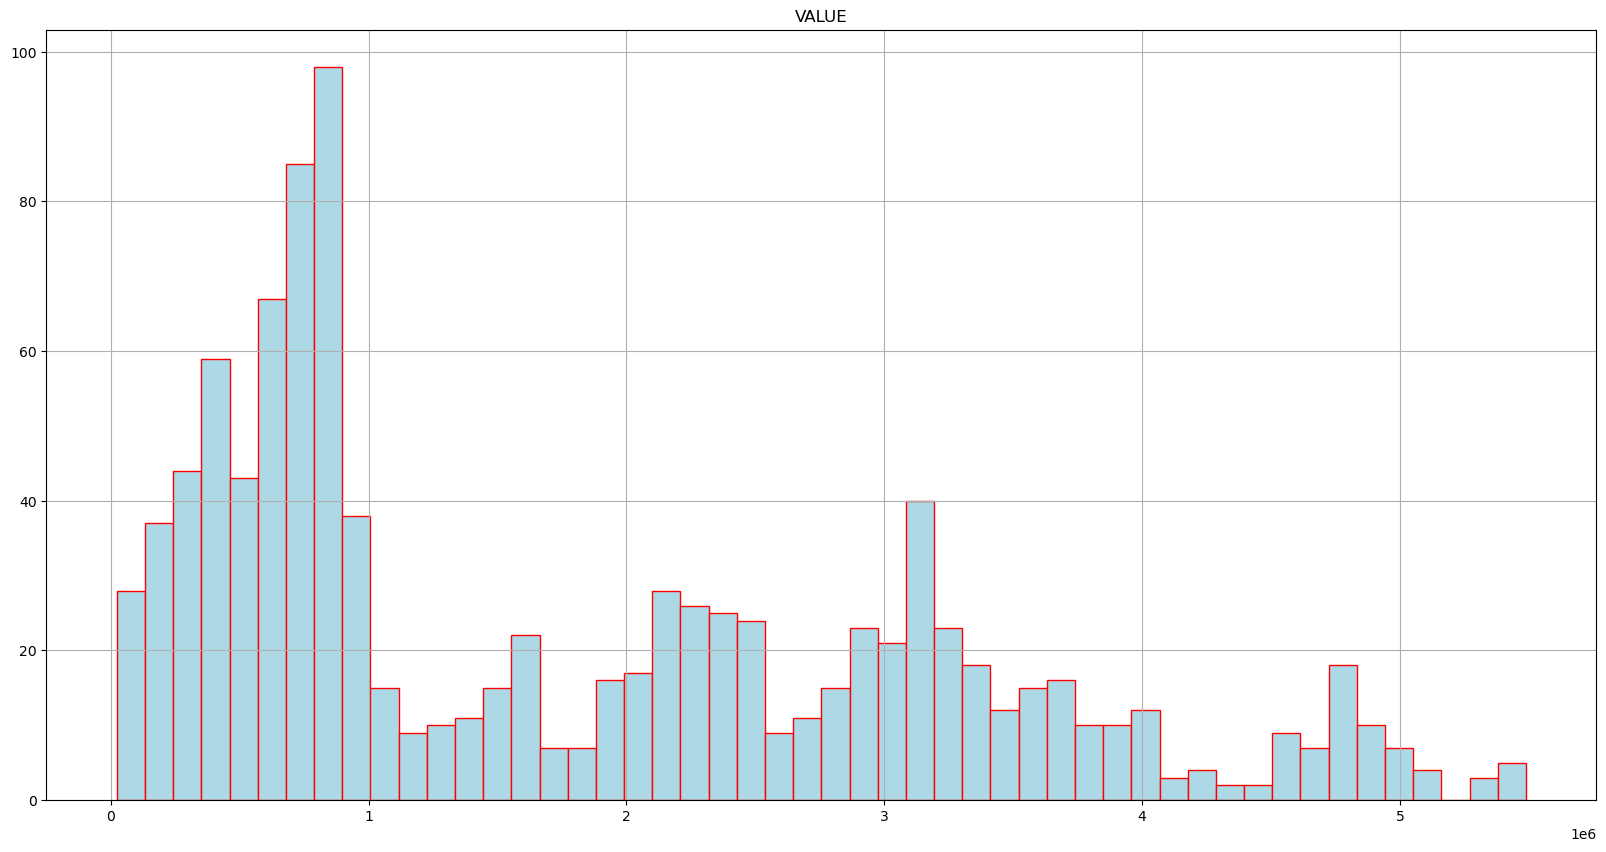

In [20]:
#plt.style.use('seaborn-whitegrid')
passenger_journeys.hist(bins=50, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Outliers

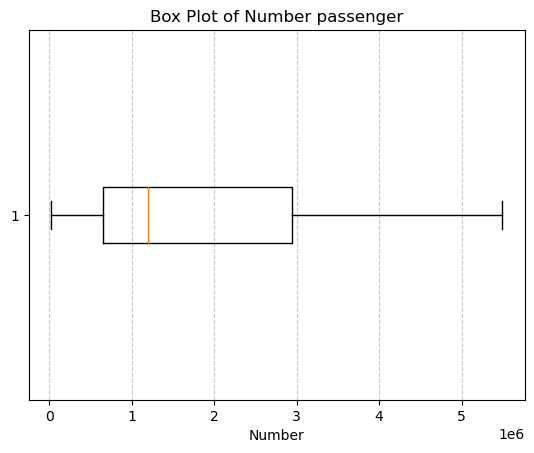

In [21]:
plt.boxplot(passenger_journeys['VALUE'], vert=False)
plt.title("Box Plot of Number passenger")
plt.xlabel("Number")
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Data visualization

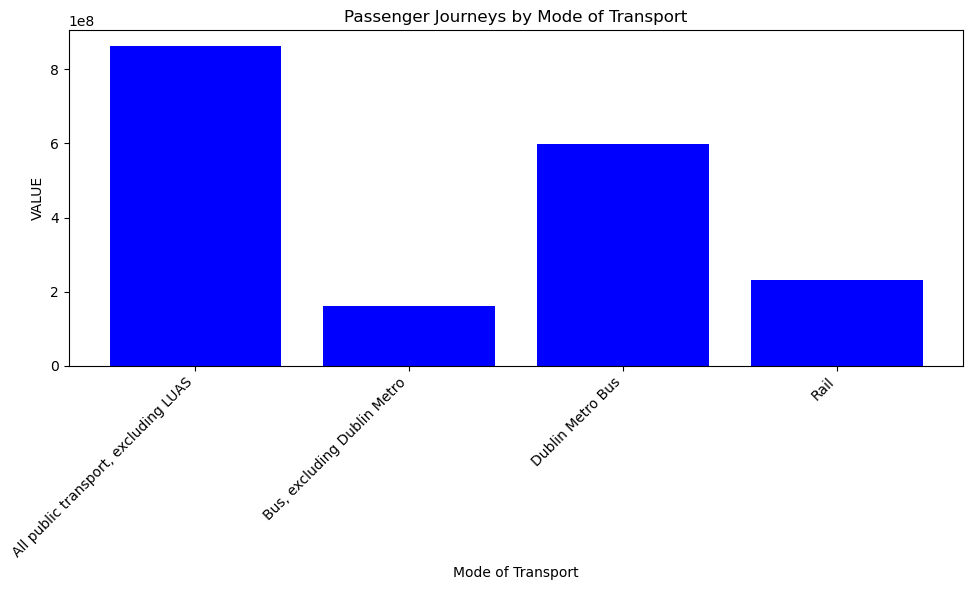

In [22]:
# Group by 'Age Range' and calculate the sum of 'VALUE_x' for each group
number_passenger_group = passenger_journeys.groupby('Mode of Transport')['VALUE'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(number_passenger_group['Mode of Transport'], number_passenger_group['VALUE'], color='blue')
plt.xlabel('Mode of Transport')
plt.ylabel('VALUE')
plt.title('Passenger Journeys by Mode of Transport')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

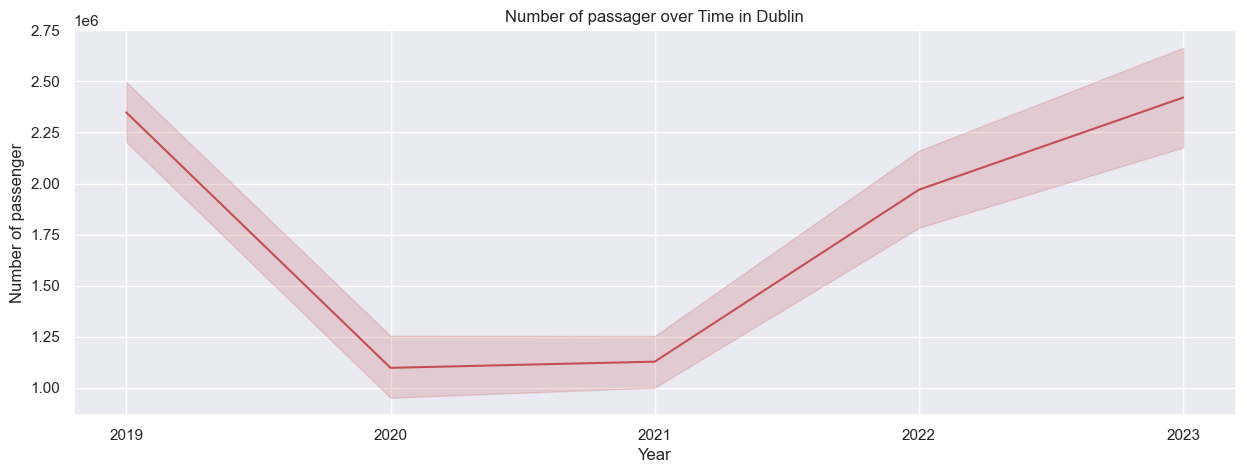

In [23]:
#Plotting a line plot to visualised Rate values over the time
sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=passenger_journeys, x="Year", y="VALUE", color="r")
plt.title("Number of passager over Time in Dublin")
plt.xlabel("Year")
plt.ylabel("Number of passenger")
plt.grid(True)

# Show the plot
plt.show()

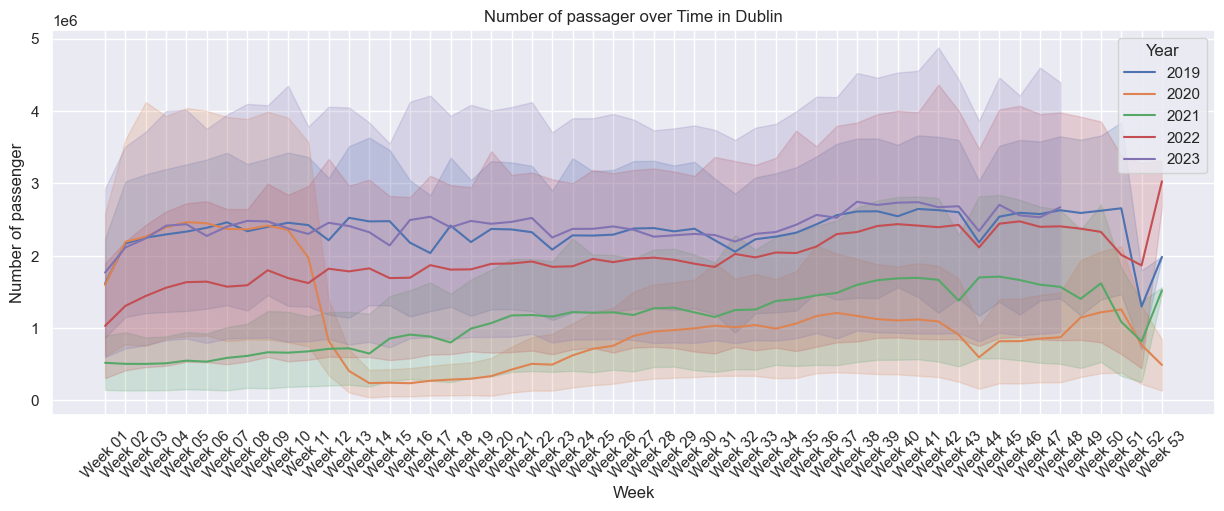

In [24]:
#Plotting a line plot to visualised Rate values over the time
#sns.set_theme()
plt.figure(figsize=(15, 5))
sns.lineplot(data=passenger_journeys, x="Week", y="VALUE", hue="Year")

plt.title("Number of passager over Time in Dublin")
plt.xlabel("Week")
plt.ylabel("Number of passenger")
#plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

## The Linear Regression using Time Series

In [25]:
import statsmodels.api as sm

In [26]:
# Print column names to check for existence of "Mode of Transport"
print(passenger_journeys.columns)


Index(['Statistic Label', 'Week', 'Mode of Transport', 'UNIT', 'VALUE',
       'Year'],
      dtype='object')


In [29]:
# Filtering the DataFrame
metro_bus = passenger_journeys[
    (passenger_journeys["Mode of Transport"] == "Dublin Metro Bus")]

In [31]:
metro_bus.head()

,Statistic Label,Week,Mode of Transport,UNIT,VALUE,Year
0,Passenger Journeys,Week 01,Dublin Metro Bus,Number,1987891.0,2019
4,Passenger Journeys,Week 02,Dublin Metro Bus,Number,2709579.0,2019
8,Passenger Journeys,Week 03,Dublin Metro Bus,Number,2784678.0,2019
12,Passenger Journeys,Week 04,Dublin Metro Bus,Number,2858346.0,2019
16,Passenger Journeys,Week 05,Dublin Metro Bus,Number,2924821.0,2019


In [34]:

# Selecting only the required columns
metro_bus = metro_bus[['Year', 'Week', 'VALUE']]

# Optionally, you can reset the index
metro_bus = metro_bus.reset_index(drop=True)

# Print or display the new DataFrame
metro_bus.head()

,Year,Week,VALUE
0,2019,Week 01,1987891.0
1,2019,Week 02,2709579.0
2,2019,Week 03,2784678.0
3,2019,Week 04,2858346.0
4,2019,Week 05,2924821.0


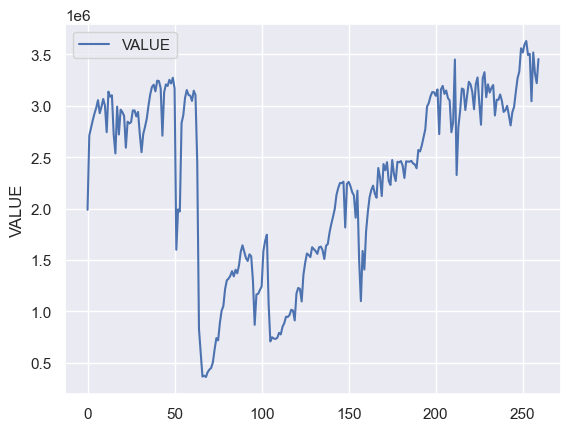

In [35]:
# plot the dataset
ax = metro_bus.plot()
ax.set_ylabel('VALUE')
plt.show()

In [37]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:

# Create X and y objects
X =metro_bus[['Year', 'Week']].astype(float)
y =  metro_bus['VALUE']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

# Calculate the train Forecasting
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the results for train and test
print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

ValueError: could not convert string to float: 'Week 01'